In [90]:
# Load data
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
documents[2]

"Although I realize that principle is not one of your strongest\npoints, I would still like to know why do do not ask any question\nof this sort about the Arab countries.\n\n   If you want to continue this think tank charade of yours, your\nfixation on Israel must stop.  You might have to start asking the\nsame sort of questions of Arab countries as well.  You realize it\nwould not work, as the Arab countries' treatment of Jews over the\nlast several decades is so bad that your fixation on Israel would\nbegin to look like the biased attack that it is.\n\n   Everyone in this group recognizes that your stupid 'Center for\nPolicy Research' is nothing more than a fancy name for some bigot\nwho hates Israel."

In [93]:
len(documents)

11314

In [94]:
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [95]:
news_df=pd.DataFrame(data=documents,columns=["documents"])

In [96]:
news_df.head()

,documents
0,Well i'm not sure about the story nad it did s...
1,"\n\n\n\n\n\n\nYeah, do you expect people to re..."
2,Although I realize that principle is not one o...
3,Notwithstanding all the legitimate fuss about ...
4,"Well, I will have to change the scoring on my ..."


In [97]:
news_df["news_clean"]=news_df["documents"].str.replace("[^a-zA-Z#]", " ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [98]:
news_df.head()    

,documents,news_clean
0,Well i'm not sure about the story nad it did s...,Well i m not sure about the story nad it did s...
1,"\n\n\n\n\n\n\nYeah, do you expect people to re...",Yeah do you expect people to read the ...
2,Although I realize that principle is not one o...,Although I realize that principle is not one o...
3,Notwithstanding all the legitimate fuss about ...,Notwithstanding all the legitimate fuss about ...
4,"Well, I will have to change the scoring on my ...",Well I will have to change the scoring on my ...


In [99]:
news_df["news_clean"]=news_df["news_clean"].apply(lambda x:x.lower())

news_df["news_clean"] = news_df["news_clean"].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [100]:
# Load stopwords (here I used Spacy for stopwords you can also use NLTK)
from spacy.lang.en.stop_words import STOP_WORDS as stop_words

# tokenization - break sentences into words
tokenized_doc = news_df["news_clean"].apply(lambda x: x.split())

# remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

# de-tokenization - Join words to get back the sentences
detokenized_doc = []
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df["news_clean"] = detokenized_doc

In [101]:
news_df.head()  

,documents,news_clean
0,Well i'm not sure about the story nad it did s...,sure story biased disagree statement media rui...
1,"\n\n\n\n\n\n\nYeah, do you expect people to re...",yeah expect people read actually accept hard a...
2,Although I realize that principle is not one o...,realize principle strongest points like know q...
3,Notwithstanding all the legitimate fuss about ...,notwithstanding legitimate fuss proposal chang...
4,"Well, I will have to change the scoring on my ...",change scoring playoff pool unfortunately time...


In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True)

X = vectorizer.fit_transform(news_df['news_clean'])

In [103]:
X.shape

(11314, 1000)

In [104]:
from sklearn.decomposition import TruncatedSVD

svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

len(svd_model.components_)

20

In [121]:
words=vectorizer.get_feature_names_out()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(words, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i+1)+": ", end='', flush=True)
    for t in sorted_terms:
        print(t[0], end=' ', flush=True)
    print(" ")

Topic 1: like know people think good time thanks  
Topic 2: thanks windows card drive mail file advance  
Topic 3: game team year games season players good  
Topic 4: drive scsi hard disk card drives problem  
Topic 5: windows file window files program problem version  
Topic 6: government space chip mail information data encryption  
Topic 7: like bike chip sounds know looks look  
Topic 8: card sale video monitor offer price jesus  
Topic 9: know card chip video government people clipper  
Topic 10: good know time bike problem jesus work  
Topic 11: think good chip clipper need encryption people  
Topic 12: thanks problem right bike good window time  
Topic 13: good people windows know sale file files  
Topic 14: space think know nasa problem year israel  
Topic 15: space good card thanks people year nasa  
Topic 16: people problem game window time work want  
Topic 17: problem good window israel people know israeli  
Topic 18: file time problem need files mail game  
Topic 19: need 

In [106]:
from sklearn.manifold import TSNE
embedding = TSNE(n_components=2).fit_transform(svd_model.fit_transform(X))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [107]:
embedding.shape

(11314, 2)

In [108]:
len(dataset.target)

11314

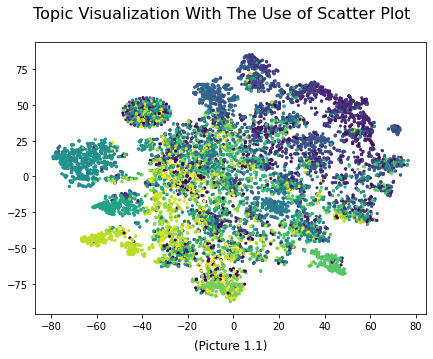

In [109]:
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], 
c = dataset.target,
s = 10, # size
edgecolor='none'
)
plt.suptitle("Topic Visualization With The Use of Scatter Plot ",fontsize = 16)
plt.title("(Picture 1.1)",y=-0.15)
plt.show()

In [110]:
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

In [111]:
def top_feats_in_doc(Xtr, features, row_id, top_n=25):
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

In [112]:
print("Most Important Words In Article Number 1\n")
top_feats_in_doc(X, words, 1, top_n=25)

Most Important Words In Article Number 1



,feature,tfidf
0,faith,0.416737
1,sorry,0.373026
2,hard,0.326264
3,need,0.268373
4,atheism,0.249785
5,logic,0.219893
6,yeah,0.216892
7,forget,0.216110
8,newsgroup,0.209015
9,runs,0.202968


In [113]:
def top_mean_feats(X, words, grp_ids=None, min_tfidf=0.1, top_n=25):
    if grp_ids:
        D = X[grp_ids].toarray()
    else:
        D = X.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, words, top_n)

In [114]:
print("Most Important Words In This DataFrame\n")
top_mean_feats(X, words, grp_ids=None, min_tfidf=0.1, top_n=25)

Most Important Words In This DataFrame



,feature,tfidf
0,like,0.020213
1,know,0.020040
2,people,0.018455
3,think,0.017792
4,thanks,0.016726
5,good,0.015722
6,time,0.013560
7,windows,0.012038
8,need,0.011593
9,right,0.011509


In [115]:
def top_feats_by_class(X, y, words, top_n=25):
    dfs = []
    labels = np.unique(y)
    for label in labels:
        feats_df = top_feats_in_doc(X, words, y, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return plot_tfidf_classfeats_h1(dfs)


In [116]:
def top_feats_by_class_1(X, y, words, min_tfidf=0.1, top_n=25):
    dfs = []
    labels = np.unique(y)
    for label in labels:
        ids = np.where(y==label)
        feats_df = top_mean_feats(X, words, grp_ids=None, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return plot_tfidf_classfeats_h(dfs)


In [117]:
def plot_tfidf_classfeats_h(dfs):
    fig = plt.figure(figsize=(15, 9), facecolor="w")
    plt.suptitle("(Picture 1.2)",x=0.56,y=0)
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Mean Tf-Idf Score", labelpad=16, fontsize=14)
        ax.set_title(str(df.label), fontsize=16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.tfidf, align='center', color='#3F5D7D')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(df.feature)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    plt.show()

In [118]:
def plot_tfidf_classfeats_h1(dfs):
    ''' Plot the data frames returned by the function plot_tfidf_classfeats(). '''
    fig = plt.figure(figsize=(15, 9), facecolor="w")
    plt.suptitle("(Picture 1.3)",x=0.56,y=0)
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Mean Tf-Idf Score", labelpad=16, fontsize=14)
        ax.set_title("Analysis of Article Number " + str(df.label), fontsize=16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.tfidf, align='center', color='#3F5D7D')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(df.feature)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    plt.show()

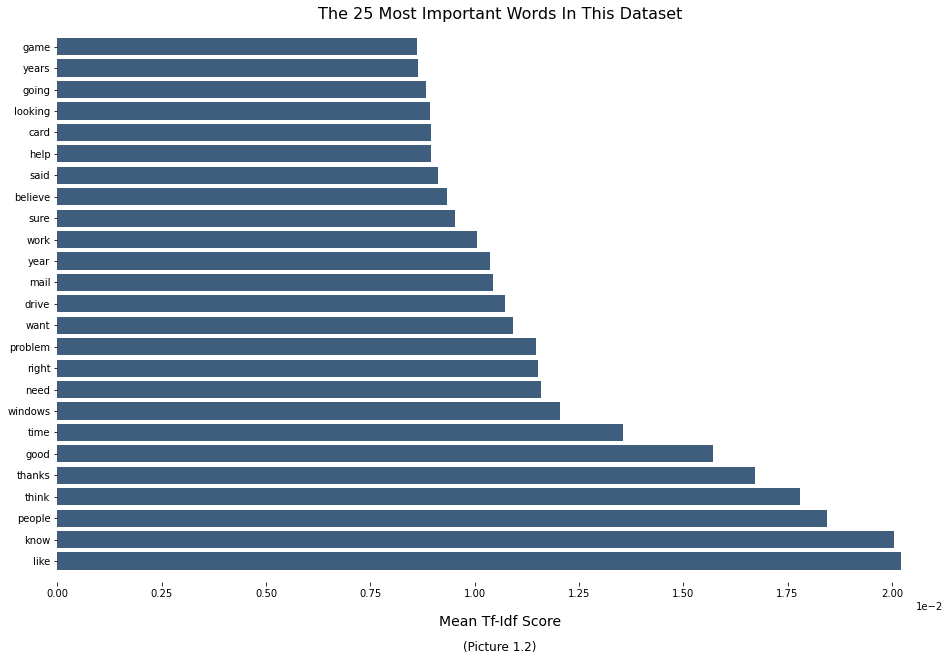

In [122]:
top_feats_by_class_1(X, ["The 25 Most Important Words In This Dataset"], words, min_tfidf=0.1, top_n=25)

Enter the article you want to analyse (MUST BE A NUMBER): 50


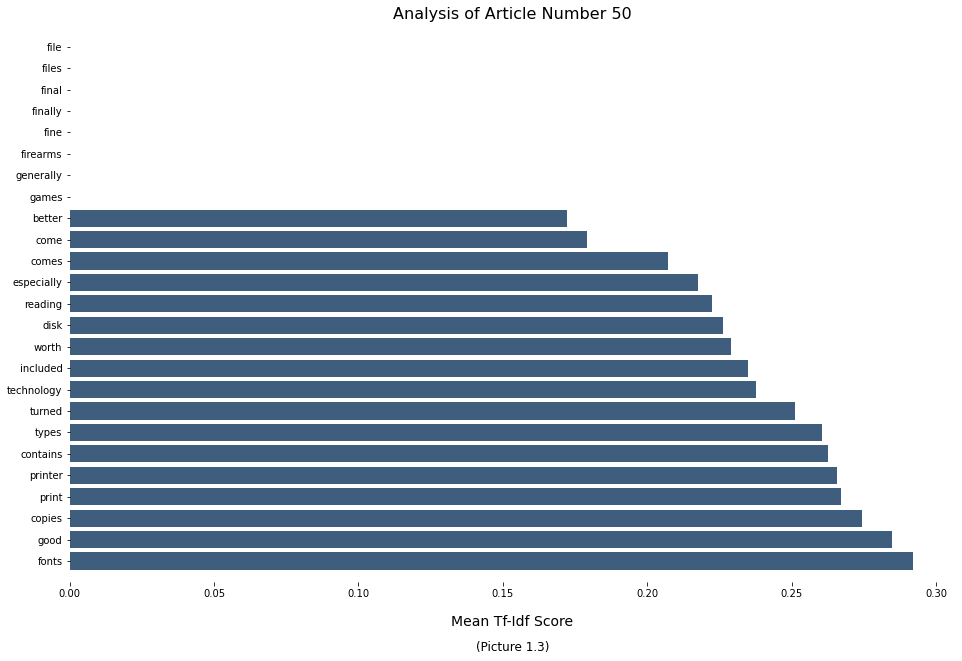

In [120]:
topic=eval(input("Enter the article you want to analyse (MUST BE A NUMBER): "))
"\n\n"
top_feats_by_class(X, topic, words, top_n=25)

Dari Topic Modelling yang telah kami lakukan, kami menggunakan 2 metode untuk melakukan topic modelling, untuk metode pertama kami melakukan SVD dengan menggunakan fungsi TRUNCATEDSVD untuk mengelompokkan 20 topic terpenting dan membuat visualisasi berupa scatterplot untuk melihat persebaran dari topik topik yang ada di DataFrame ini, Scatterplot ini dapat dilihat di Picture 1.1. Selain itu kami juga menggunakan TF-IDF Score untuk melihat kata paling relevan di DataFrame ini yang dapat dilihat di Barplot pada Picture 1.2. Kami juga membuat sebuah Barplot interaktif yang dapat memberikan output berupa kata paling relevan dari tiap dokumen yang ada di DataFrame ini, ini dapat ditemukan di Picture 1.3

Dari Topic Modelling Analysis ini kami dapat menyimpulkan bahwa dari 25 kata paling relevan dapat dilihat bahwa mayoritas kata disana merupakan kata yang cukup dasar dan cenderung dapat ditemukan di seluruh topik pembicaraan, akan tetapi dapat ditemukan juga beberapa kata yang cukup spesifik mengacu pada sebuah topik seperti:

Windows - Teknologi

Drive - Otomotif

Mail - Teknologi/Komunikasi

Card - Komunikasi/Sosial

Game - Hiburan/Teknologi